In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 75 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 3
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 1





WILSHIRE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2019-02-01
Successfully loaded params from ../data/pct_params/wilshire_3yr_3param.json
{   'params': {   'amounts': [-0.99, 0.99, 0.99],
                  'qs': [   0.8808697041203561,
                            0.8312861477771614,
                            0.17126234434301635]},
    'sd': 0.1970625934807088,
    'window': 76}
 1: Final value: $49230.83 (window = 76; sd = 0.197)

% in now: 1.0
Actions taken: 35
Wrote params to ../data/pct_params/wilshire_3yr_3param.json


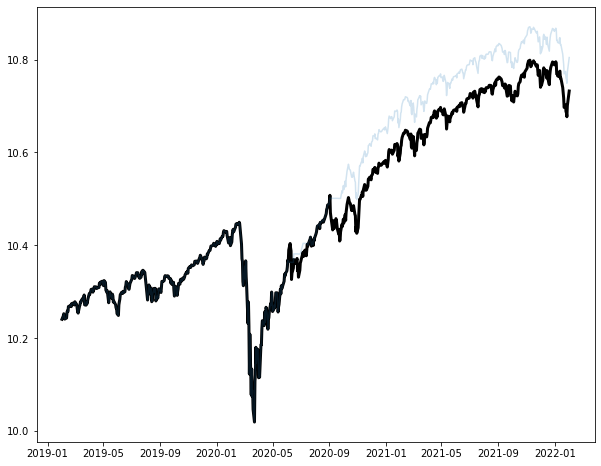

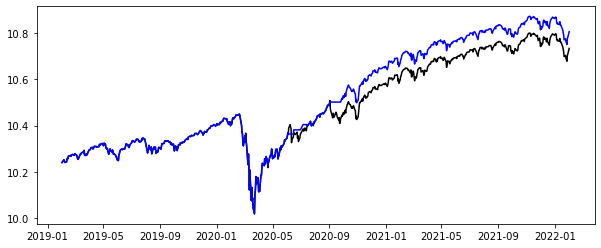

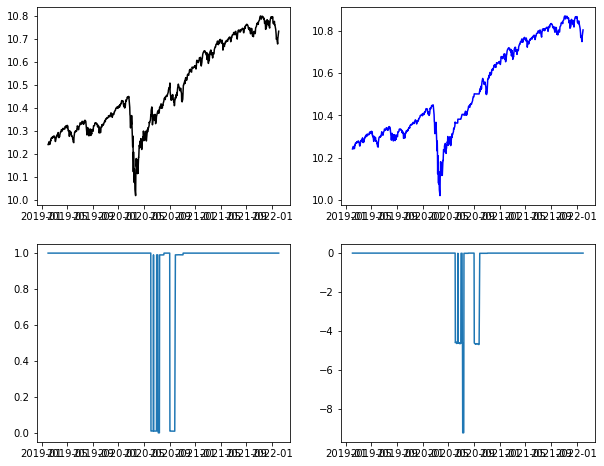



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2019-02-01
Successfully loaded params from ../data/pct_params/wilshire_3yr_2param.json
{   'params': {   'amounts': [-0.9337606188823253, 0.5721748439968048],
                  'qs': [-0.034309688840349566, 0.08548532829535976]},
    'sd': 0.01451319733481684,
    'window': 20}
 1: Final value: $54275.21 (window = 20; sd = 0.015)

% in now: 0.6032751782305499
Actions taken: 27
Wrote params to ../data/pct_params/wilshire_3yr_2param.json


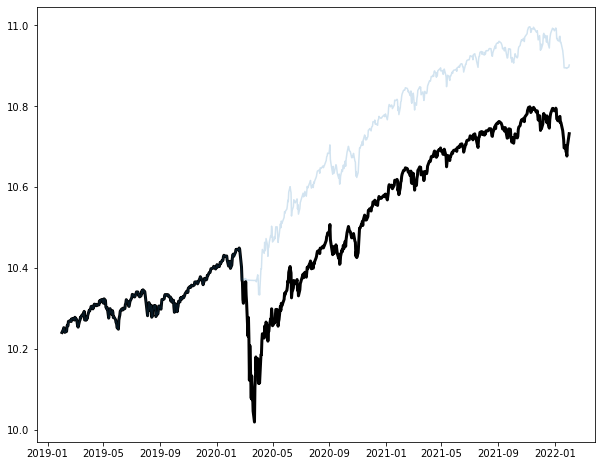

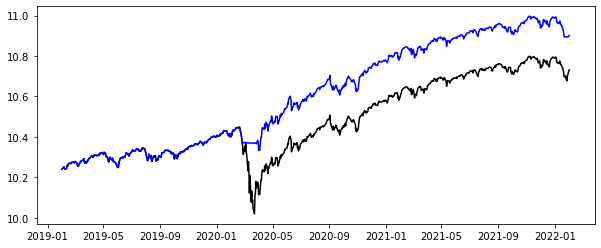

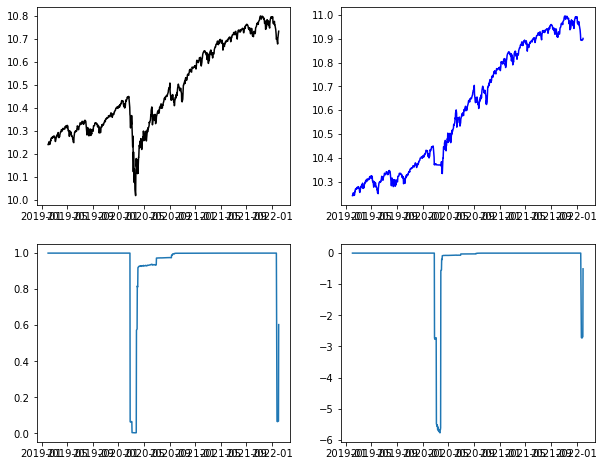



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2019-02-01
Successfully loaded params from ../data/pct_params/wilshire_3yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.07839064458375034]},
    'sd': 0.010575806557707413,
    'window': 20}
 1: Final value: $45806.20 (window = 20; sd = 0.011)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/wilshire_3yr_1param.json


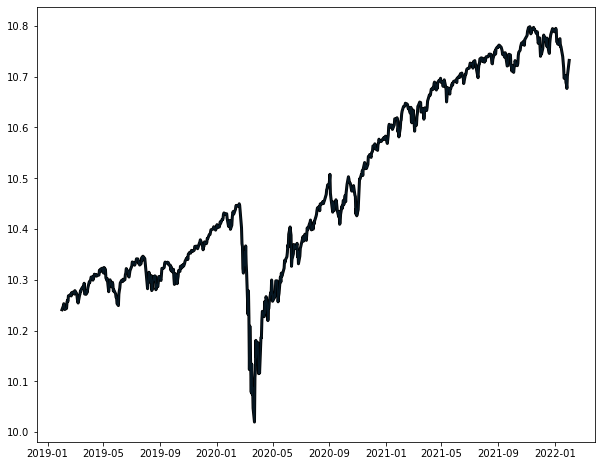

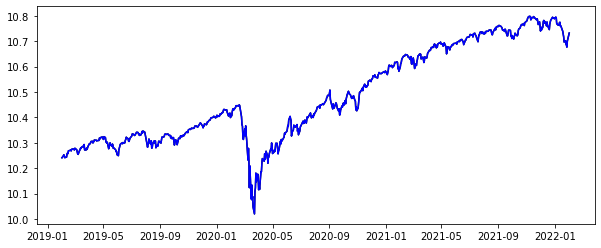

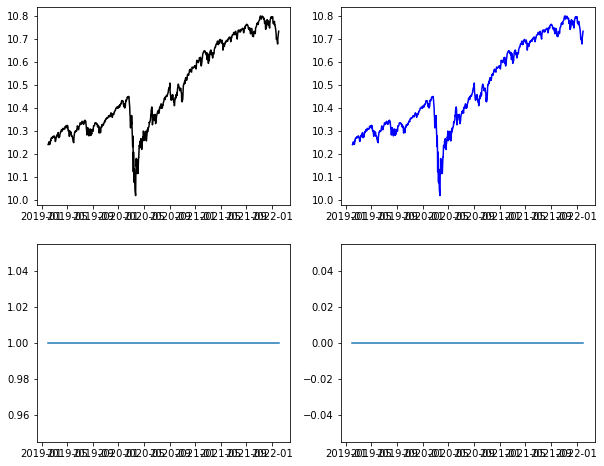




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2019-02-01
Successfully loaded params from ../data/pct_params/nasdaq_3yr_3param.json
{   'params': {   'amounts': [-0.7331173230884658, -0.99, 0.5722662830346109],
                  'qs': [   0.7831548444616078,
                            -0.029819008964696338,
                            -0.9403030747338013]},
    'sd': 0.05425128878043319,
    'window': 378}
 1: Final value: $15116.82 (window = 378; sd = 0.054)

% in now: 9.490093522817266e-07
Actions taken: 3
Wrote params to ../data/pct_params/nasdaq_3yr_3param.json


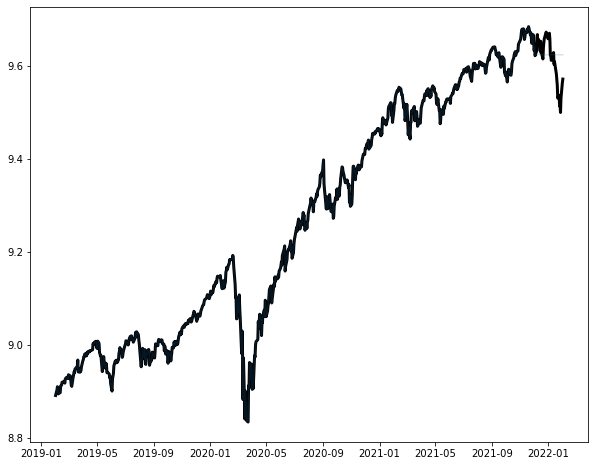

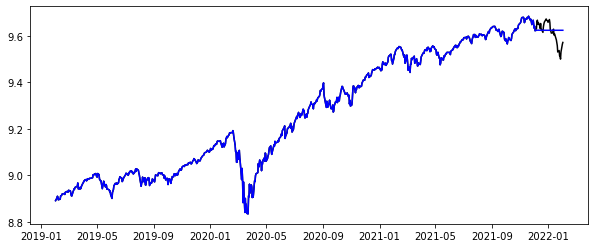

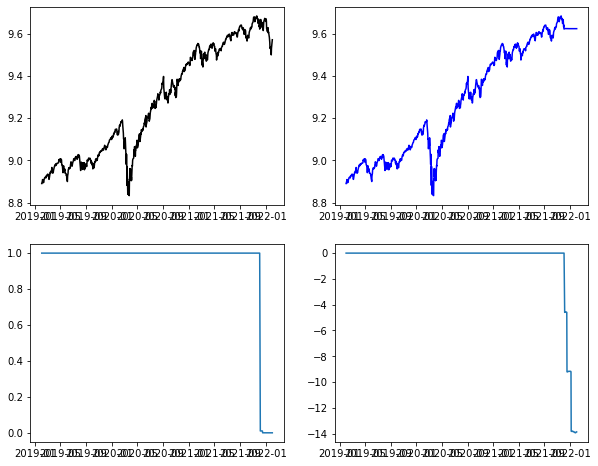



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2019-02-01
Successfully loaded params from ../data/pct_params/nasdaq_3yr_2param.json
{   'params': {   'amounts': [0.9177231409839067, -0.9564858822262403],
                  'qs': [0.4233504698244782, 0.6706169024014486]},
    'sd': 0.2717350397416503,
    'window': 242}
 1: Final value: $16862.59 (window = 242; sd = 0.272)

% in now: 0.9999603654113737
Actions taken: 12
Wrote params to ../data/pct_params/nasdaq_3yr_2param.json


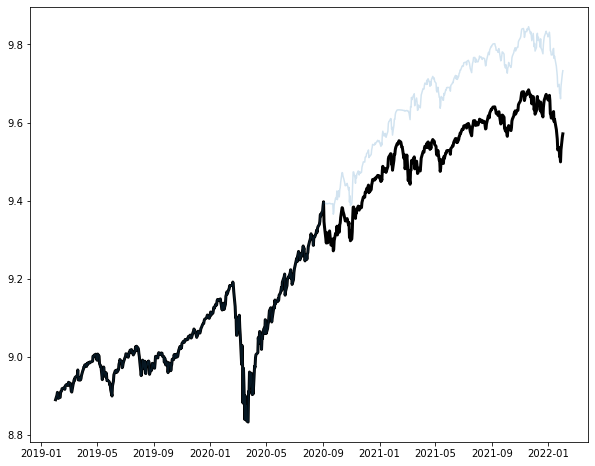

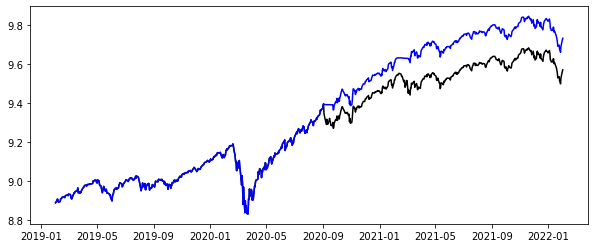

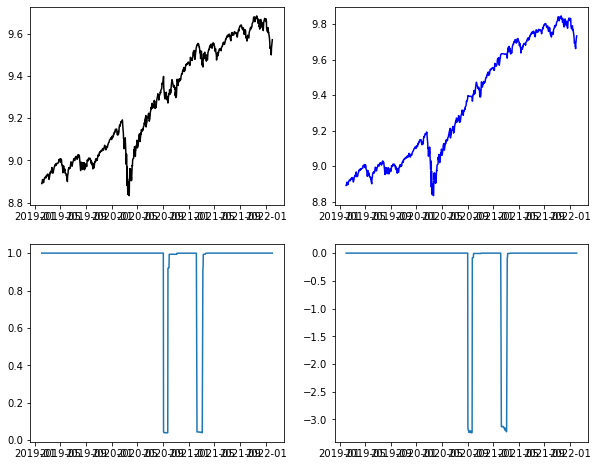



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2019-02-01
Successfully loaded params from ../data/pct_params/nasdaq_3yr_1param.json
{   'params': {'amounts': [-0.99], 'qs': [0.073076629000201]},
    'sd': 0.04729354044271555,
    'window': 361}
 1: Final value: $15079.56 (window = 361; sd = 0.047)

% in now: 9.513541376141895e-09
Actions taken: 4
Wrote params to ../data/pct_params/nasdaq_3yr_1param.json


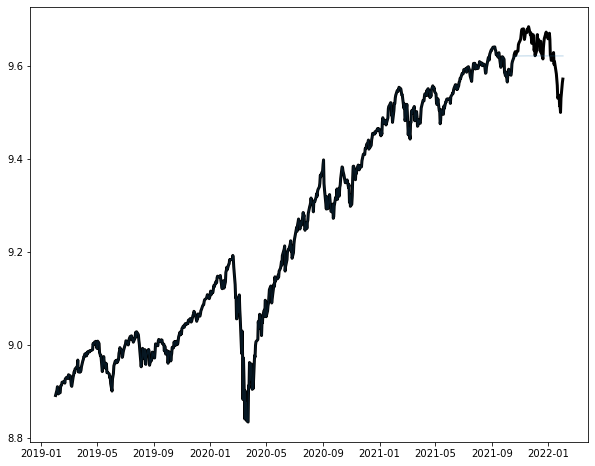

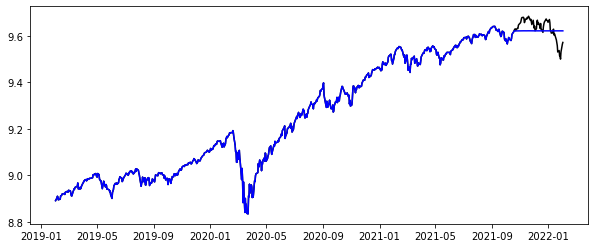

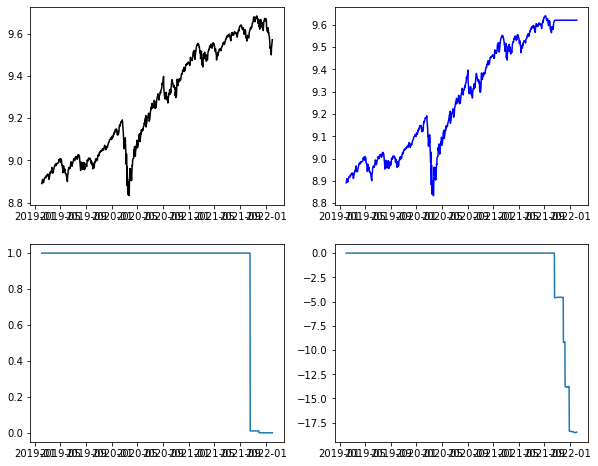

Percents in:
wilshire: [1.0, 0.6033, 1.0]
nasdaq: [0.0, 1.0, 0.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_3yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')